# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [12]:
!git config --global http.postBuffer 524288000

In [14]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 98743, done.
remote: Counting objects: 100% (1249/1249), done.
remote: Compressing objects: 100% (635/635), done.
remote: Total 98743 (delta 686), reused 1045 (delta 586), pack-reused 97494 (from 1)
Receiving objects: 100% (98743/98743), 622.28 MiB | 5.87 MiB/s, done.
Resolving deltas: 100% (71670/71670), done.
Updating files: 100% (3875/3875), done.


In [18]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

zsh:1: command not found: apt-get
Processing /Users/canerozer/Desktop/BU/FALL2024/DS542/Project/plate_recognition/Tensorflow/models/research
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pillow-10.4.0-cp38-cp38-macosx_10_10_x86_64.whl.metadata (9.2 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-macosx_10_12_x86_64.whl.metadata (5.7 kB)
  Using cached numpy-1.24.4-cp38-cp38-macosx_10_9_x86_64.whl.metadata (5.6 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
INFO: pip is looking at multiple versions of tf-models-official to determine which version is compatible with other requirements. This could take a while.
  Installing build dependencies ... done
  Getting requirements to build wheel 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached fasteners-0.19-py3-none-any.whl.metadata (4.9 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached contourpy-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata (5.9 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached pkgutil_res

  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached promise-2.3-py3-none-any.whl
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)


  Using cached MarkupSafe-2.1.5-cp38-cp38-macosx_10_9_x86_64.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 9.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.9 MB/s eta 0:00:00ta 0:00:01
Using cached matplotlib-3.7.5-cp38-cp38-macosx_10_12_x86_64.whl (7.4 MB)
Using cached pillow-10.4.0-cp38-cp38-macosx_10_10_x86_64.whl (3.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.8 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.1 MB/s eta 0:00:00
Using cached contourpy-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl (247 kB)
Using cached cyc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 7.5 MB/s eta 0:00:00a 0:00:01
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 9.8 MB/s eta 0:00:00:00:0100:01
Using cached pkgutil_resolve_name-1.3.10-py3-none-any.whl (4.7 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
Using cached rpds_py-0.20.1-cp38-cp38-macosx_10_12_x86_64.whl (327 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 9.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.0 MB/s eta 0:00:00 0:00:01
Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.5 MB/s eta 0:00:00a 0:00:01m
Using cached bleach-6.1.0-py3-none-any.whl (162 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 

      Successfully uninstalled typing_extensions-4.12.2


In [13]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2024-11-30 19:41:32.069182: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Running tests under Python 3.8.3: /Users/canerozer/Desktop/BU/FALL2024/DS542/Project/plate_recognition/anprsys/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W1130 19:41:40.376755 140704503709120 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/plate_recognition/anprsys/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' ins

I1130 19:41:44.762876 140704503709120 efficientnet_model.py:143] round_filter input=16 output=16
I1130 19:41:44.762981 140704503709120 efficientnet_model.py:143] round_filter input=24 output=24
I1130 19:41:44.906874 140704503709120 efficientnet_model.py:143] round_filter input=24 output=24
I1130 19:41:44.906976 140704503709120 efficientnet_model.py:143] round_filter input=40 output=40
I1130 19:41:45.046994 140704503709120 efficientnet_model.py:143] round_filter input=40 output=40
I1130 19:41:45.047101 140704503709120 efficientnet_model.py:143] round_filter input=80 output=80
I1130 19:41:45.247709 140704503709120 efficientnet_model.py:143] round_filter input=80 output=80
I1130 19:41:45.247879 140704503709120 efficientnet_model.py:143] round_filter input=112 output=112
I1130 19:41:45.466485 140704503709120 efficientnet_model.py:143] round_filter input=112 output=112
I1130 19:41:45.466586 140704503709120 efficientnet_model.py:143] round_filter input=192 output=192
I1130 19:41:45.737673 14

I1130 19:41:48.929613 140704503709120 efficientnet_model.py:143] round_filter input=112 output=120
I1130 19:41:48.929756 140704503709120 efficientnet_model.py:143] round_filter input=192 output=208
I1130 19:41:49.280645 140704503709120 efficientnet_model.py:143] round_filter input=192 output=208
I1130 19:41:49.280749 140704503709120 efficientnet_model.py:143] round_filter input=320 output=352
I1130 19:41:49.437196 140704503709120 efficientnet_model.py:143] round_filter input=1280 output=1408
I1130 19:41:49.481761 140704503709120 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

I1130 19:41:53.923937 140704503709120 ssd_efficientnet_bifpn_feature_extractor.py:161] EfficientDet EfficientNet backbone version: efficientnet-b5
I1130 19:41:53.924052 140704503709120 ssd_efficientnet_bifpn_feature_extractor.py:163] EfficientDet BiFPN num filters: 288
I1130 19:41:53.924096 140704503709120 ssd_efficientnet_bifpn_feature_extractor.py:164] EfficientDet BiFPN num iterations: 7
I1130 19:41:53.925936 140704503709120 efficientnet_model.py:143] round_filter input=32 output=48
I1130 19:41:53.940465 140704503709120 efficientnet_model.py:143] round_filter input=32 output=48
I1130 19:41:53.940566 140704503709120 efficientnet_model.py:143] round_filter input=16 output=24
I1130 19:41:54.113444 140704503709120 efficientnet_model.py:143] round_filter input=16 output=24
I1130 19:41:54.113548 140704503709120 efficientnet_model.py:143] round_filter input=24 output=40
I1130 19:41:54.675839 140704503709120 efficientnet_model.py:143] round_filter input=24 output=40
I1130 19:41:54.675948 14

I1130 19:42:01.650521 140704503709120 efficientnet_model.py:143] round_filter input=16 output=32
I1130 19:42:01.650653 140704503709120 efficientnet_model.py:143] round_filter input=24 output=48
I1130 19:42:02.164257 140704503709120 efficientnet_model.py:143] round_filter input=24 output=48
I1130 19:42:02.164367 140704503709120 efficientnet_model.py:143] round_filter input=40 output=80
I1130 19:42:02.656992 140704503709120 efficientnet_model.py:143] round_filter input=40 output=80
I1130 19:42:02.657103 140704503709120 efficientnet_model.py:143] round_filter input=80 output=160
I1130 19:42:03.421684 140704503709120 efficientnet_model.py:143] round_filter input=80 output=160
I1130 19:42:03.421792 140704503709120 efficientnet_model.py:143] round_filter input=112 output=224
I1130 19:42:04.172554 140704503709120 efficientnet_model.py:143] round_filter input=112 output=224
I1130 19:42:04.172662 140704503709120 efficientnet_model.py:143] round_filter input=192 output=384
I1130 19:42:05.323168 

In [11]:
pip install protobuf==3.20.3

  Using cached protobuf-3.20.3-cp38-cp38-macosx_10_9_x86_64.whl.metadata (679 bytes)
Using cached protobuf-3.20.3-cp38-cp38-macosx_10_9_x86_64.whl (982 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.0
    Uninstalling protobuf-5.29.0:
      Successfully uninstalled protobuf-5.29.0
Note: you may need to restart the kernel to use updated packages.


In [15]:
!pip install tensorflow --upgrade

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tf_estimator_nightly-2.5.0.dev2021032501-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow-datasets 4.2.0 requires attrs>=18.1.0, which is not installed.
tensorflow-datasets 4.2.0 requires dill, which is not installed.
tensorflow-datasets 4.2.0 requires future, which is not installed.
tensorflow-datasets 4.2.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.2.0 re

In [13]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [18]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.28.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.1
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
cycler                        0.10.0
cython                        3.0a6
dataclasses                   0.8
decorator                     5.0.3
flatbuffers                   1.12
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.1.0
google-auth                   1.28.0
google-auth-oauthlib          0.4.4
google-cloud-bigquery         2.13.1
google-pasta                 

In [6]:
import object_detection

In [15]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2024-11-30 19:45:16--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
download.tensorflow.org (download.tensorflow.org) çözümleniyor... 142.251.32.123, 142.251.40.155, 142.250.65.219, ...
download.tensorflow.org (download.tensorflow.org)[142.251.32.123]:80 bağlanılıyor... bağlantı kuruldu.
HTTP isteği gönderildi, yanıt bekleniyor... 200 OK
Uzunluk: 20515344 (20M) [application/x-tar]
Kayıt yeri: `ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

ssd_mobilenet_v2_fp 100%[===================>]  19,56M  9,71MB/s    içinde 2,0s

2024-11-30 19:45:19 (9,71 MB/s) - `ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz' kaydedildi [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x s

# 2. Create Label Map

In [7]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [17]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), done.


In [19]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [20]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [8]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2024-12-01 00:26:47.628162: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [23]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [24]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [25]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [26]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [27]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [28]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [29]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


In [30]:
!{command}

2024-11-30 20:15:54.367324: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
^C


# 7. Evaluate the Model

In [31]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [32]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [33]:
!{command}

2024-11-30 22:59:23.705792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1130 22:59:30.503026 140704503709120 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1130 22:59:30.503173 140704503709120 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1130 22:59:30.503226 140704503709120 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1130 22:59:30.503273 140704503709120 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1130 22:59:30.503342 140704503709120 model_lib_v2.py:1106] Expected number of evaluation epoc

INFO:tensorflow:Performing evaluation on 22 images.
I1130 22:59:57.141097 140704503709120 coco_evaluation.py:293] Performing evaluation on 22 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I1130 22:59:57.141299 140704503709120 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I1130 22:59:57.142326 140704503709120 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.545
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.970
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.441
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.486
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100

# 8. Load Train Model From Checkpoint

In [9]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [10]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [11]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [16]:
category_index

{1: {'id': 1, 'name': 'licence'}}

In [73]:
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars411.png')
#"/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/HASARLI/Cars177.png"
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', 'Cars177.png')



In [59]:
IMAGE_PATH

'Tensorflow/workspace/images/train/Cars177.png'

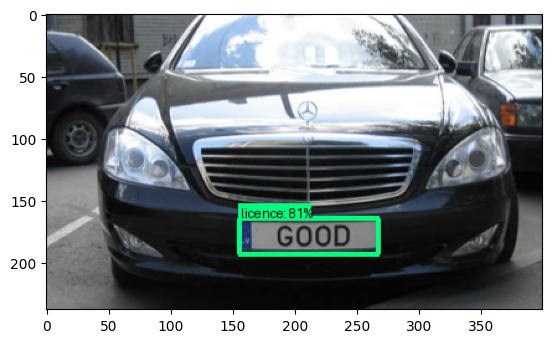

In [42]:
# "/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/plate_recognition/Tensorflow/workspace/images/train/Cars177.png"

img = cv2.imread("/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/plate_recognition/Tensorflow/workspace/images/train/Cars177.png")
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

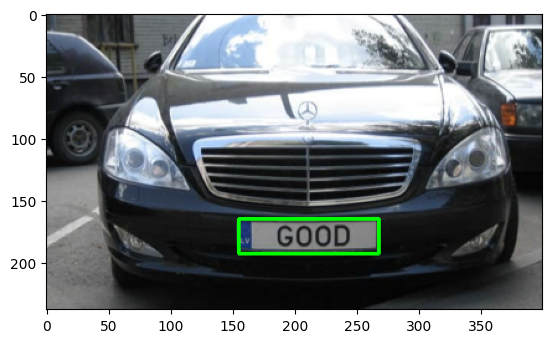

In [48]:
image_height, image_width, _ =img.shape
bounding_box=detections['detection_boxes'][0]
y_min, x_min, y_max, x_max = bounding_box
top = int(y_min * image_height)
left = int(x_min * image_width)
bottom = int(y_max * image_height)
right = int(x_max * image_width)

color = (0, 255, 0)  # Green color in BGR
thickness = 2        # Line thickness
cv2.rectangle(img, (left, top), (right, bottom), color, thickness)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
image_np_with_detections

array([[[ 61,  63,  63],
        [ 59,  59,  58],
        [ 61,  58,  53],
        ...,
        [142, 135, 129],
        [136, 129, 123],
        [113, 105, 100]],

       [[ 59,  61,  61],
        [ 57,  57,  56],
        [ 60,  57,  52],
        ...,
        [142, 135, 129],
        [136, 129, 123],
        [113, 105, 100]],

       [[ 60,  62,  62],
        [ 59,  59,  58],
        [ 61,  58,  53],
        ...,
        [142, 135, 129],
        [136, 129, 123],
        [113, 105, 100]],

       ...,

       [[131, 132, 133],
        [128, 130, 131],
        [126, 128, 129],
        ...,
        [111, 111, 111],
        [107, 107, 107],
        [107, 107, 107]],

       [[129, 131, 131],
        [127, 129, 130],
        [125, 127, 128],
        ...,
        [117, 117, 117],
        [113, 113, 113],
        [116, 116, 116]],

       [[130, 132, 133],
        [128, 130, 131],
        [127, 129, 130],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [114, 114, 114]]

In [110]:
image_np

array([[[ 61,  63,  63],
        [ 59,  59,  58],
        [ 61,  58,  53],
        ...,
        [142, 135, 129],
        [136, 129, 123],
        [113, 105, 100]],

       [[ 59,  61,  61],
        [ 57,  57,  56],
        [ 60,  57,  52],
        ...,
        [142, 135, 129],
        [136, 129, 123],
        [113, 105, 100]],

       [[ 60,  62,  62],
        [ 59,  59,  58],
        [ 61,  58,  53],
        ...,
        [142, 135, 129],
        [136, 129, 123],
        [113, 105, 100]],

       ...,

       [[131, 132, 133],
        [128, 130, 131],
        [126, 128, 129],
        ...,
        [111, 111, 111],
        [107, 107, 107],
        [107, 107, 107]],

       [[129, 131, 131],
        [127, 129, 130],
        [125, 127, 128],
        ...,
        [117, 117, 117],
        [113, 113, 113],
        [116, 116, 116]],

       [[130, 132, 133],
        [128, 130, 131],
        [127, 129, 130],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [114, 114, 114]]

In [18]:
detections['detection_boxes']

array([[0.696033  , 0.3889548 , 0.81117725, 0.6720909 ],
       [0.71738005, 0.4180394 , 0.79762363, 0.6284164 ],
       [0.21842973, 0.        , 0.26954225, 0.04375304],
       [0.24083097, 0.        , 0.2891659 , 0.04312167],
       [0.19661315, 0.        , 0.24838461, 0.0443676 ],
       [0.20699805, 0.        , 0.2565583 , 0.03454857],
       [0.66693074, 0.37795526, 0.83624977, 0.70113736],
       [0.63757885, 0.48012727, 0.6917118 , 0.6613044 ],
       [0.18087113, 0.        , 0.23156554, 0.03467525],
       [0.16833627, 0.        , 0.22229299, 0.04417345],
       [0.5218014 , 0.31505665, 0.5599112 , 0.4900262 ],
       [0.5465495 , 0.31340945, 0.5868524 , 0.48802966],
       [0.26861832, 0.        , 0.31250766, 0.04438841],
       [0.70475584, 0.40134713, 0.87825626, 0.57344246],
       [0.73869526, 0.41820163, 0.8081701 , 0.5960205 ],
       [0.7490459 , 0.        , 0.82376474, 0.03560473],
       [0.6978677 , 0.43278995, 0.8642176 , 0.6148114 ],
       [0.64976233, 0.5065855 ,

In [19]:
detections['detection_scores']

array([0.8108375 , 0.06717574, 0.06185083, 0.05274347, 0.05202098,
       0.05091127, 0.0431537 , 0.04246816, 0.039324  , 0.03158545,
       0.03087814, 0.03044924, 0.02938466, 0.02803213, 0.02715712,
       0.02649862, 0.02604489, 0.02562874, 0.02539   , 0.02513   ,
       0.02490283, 0.0247005 , 0.02465542, 0.02407114, 0.02377544,
       0.02361497, 0.02323985, 0.02196945, 0.02173444, 0.02110695,
       0.02109898, 0.02090203, 0.02076741, 0.02070066, 0.02056131,
       0.02038821, 0.02026082, 0.02009252, 0.02001021, 0.0200093 ,
       0.01998502, 0.01975657, 0.01935214, 0.01889285, 0.01816608,
       0.01813942, 0.0180263 , 0.01784061, 0.01770623, 0.01743926,
       0.01740542, 0.01730233, 0.01722796, 0.01690289, 0.01654862,
       0.01649705, 0.01640785, 0.01634844, 0.01610456, 0.01589916,
       0.0157985 , 0.0155005 , 0.01539626, 0.01522305, 0.01499108,
       0.01498612, 0.01482459, 0.01482293, 0.01459857, 0.01435837,
       0.01430004, 0.01411653, 0.01402337, 0.01388907, 0.01351

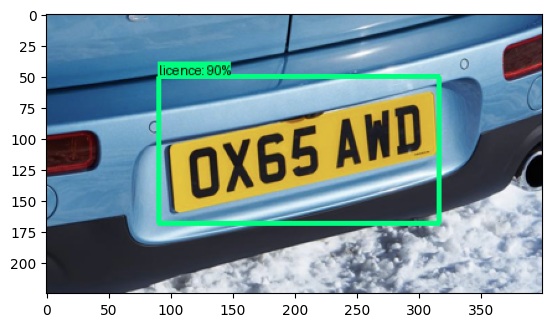

In [25]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', 'Cars33.png')

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
detections['detection_boxes']

array([[2.27957278e-01, 2.25905746e-01, 7.48484731e-01, 7.93718576e-01],
       [3.86633933e-01, 2.51009047e-01, 6.82120502e-01, 7.26080716e-01],
       [8.87403011e-01, 2.31320634e-01, 9.91697431e-01, 4.54638064e-01],
       [6.93133831e-01, 9.51614618e-01, 7.50167012e-01, 9.90972400e-01],
       [8.82405043e-01, 2.70449758e-01, 9.88404512e-01, 5.33013999e-01],
       [6.66564524e-01, 9.57955480e-01, 7.20244825e-01, 9.98487115e-01],
       [7.09910393e-01, 9.49964523e-01, 7.73401976e-01, 9.88865495e-01],
       [2.42582634e-01, 4.82492387e-01, 6.19847059e-01, 7.93856204e-01],
       [5.13558209e-01, 1.27546281e-01, 1.00000000e+00, 8.67382288e-01],
       [2.92118669e-01, 3.35214615e-01, 6.44823492e-01, 7.87183046e-01],
       [7.23946571e-01, 9.52705801e-01, 7.93664098e-01, 9.97005761e-01],
       [7.98685551e-02, 1.76727802e-01, 6.91739678e-01, 6.99863791e-01],
       [8.10554922e-01, 7.34900951e-01, 8.83061707e-01, 8.03850532e-01],
       [2.97474265e-02, 2.28643417e-01, 9.96206582e

In [27]:
detections['detection_scores']

array([0.8982297 , 0.148865  , 0.10534398, 0.09928214, 0.09520996,
       0.09363012, 0.09097291, 0.08973324, 0.07394117, 0.07080013,
       0.06546803, 0.06460772, 0.06363581, 0.05655051, 0.05265638,
       0.05027057, 0.0483794 , 0.04513025, 0.04487833, 0.04426917,
       0.04397042, 0.04280456, 0.04273182, 0.04178815, 0.04052161,
       0.04047332, 0.04015128, 0.0389384 , 0.03888404, 0.03841375,
       0.03829258, 0.03777359, 0.03725933, 0.03605833, 0.03581408,
       0.03533529, 0.03467194, 0.03369307, 0.03325684, 0.03283806,
       0.03277521, 0.03276242, 0.03218083, 0.03198815, 0.03166945,
       0.03110907, 0.03028195, 0.02915546, 0.0291302 , 0.02907054,
       0.02898972, 0.02836564, 0.0283441 , 0.02822449, 0.02810252,
       0.02739756, 0.02733342, 0.02700821, 0.02673062, 0.02658555,
       0.02644906, 0.02642619, 0.02641549, 0.02633708, 0.02611337,
       0.02605254, 0.02587437, 0.02578756, 0.02558935, 0.02548075,
       0.02547007, 0.02520472, 0.02481808, 0.02470776, 0.02461

In [32]:
max(detections['detection_scores'])

0.8982297

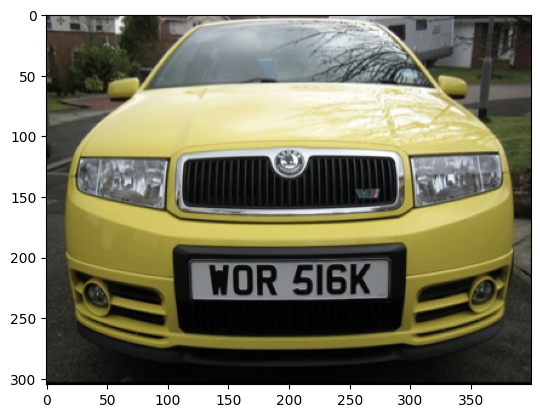

In [49]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', 'Cars11.png')

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

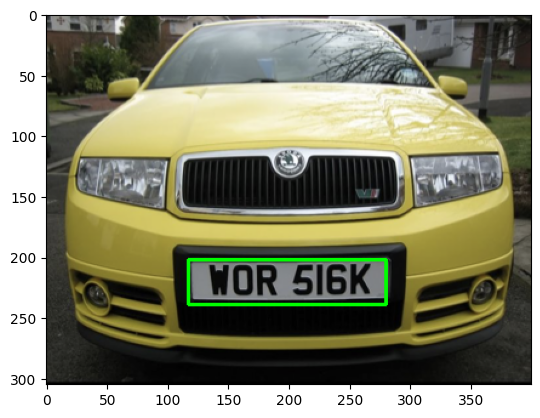

In [50]:
image_height, image_width, _ =img.shape
bounding_box=detections['detection_boxes'][0]
y_min, x_min, y_max, x_max = bounding_box
top = int(y_min * image_height)
left = int(x_min * image_width)
bottom = int(y_max * image_height)
right = int(x_max * image_width)

color = (0, 255, 0)  # Green color in BGR
thickness = 2        # Line thickness
cv2.rectangle(img, (left, top), (right, bottom), color, thickness)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [35]:
detections['detection_boxes']

array([[0.6637493 , 0.2940896 , 0.7853914 , 0.70233476],
       [0.67069966, 0.2878769 , 0.77628165, 0.5589765 ],
       [0.36566517, 0.24656063, 0.5214037 , 0.7655249 ],
       [0.36670455, 0.74969697, 0.51704985, 0.9463384 ],
       [0.66429716, 0.45519894, 0.77308613, 0.7212034 ],
       [0.68890893, 0.30342942, 0.79524887, 0.6008042 ],
       [0.53219193, 0.3248498 , 0.6212613 , 0.685379  ],
       [0.3845907 , 0.05415388, 0.5374006 , 0.2518559 ],
       [0.6442299 , 0.39488685, 0.801788  , 0.71595204],
       [0.6501048 , 0.28262115, 0.81228   , 0.6111826 ],
       [0.        , 0.        , 0.06530213, 0.18550274],
       [0.        , 0.        , 0.05852108, 0.13689645],
       [0.        , 0.        , 0.06072028, 0.11290285],
       [0.49784523, 0.        , 0.58063346, 0.03423308],
       [0.4086884 , 0.        , 0.90978754, 0.9279547 ],
       [0.51481366, 0.        , 0.6023257 , 0.03777937],
       [0.04250774, 0.0095689 , 0.83434784, 0.8391626 ],
       [0.63717973, 0.24914671,

In [37]:
detections['detection_scores']

array([0.69823223, 0.1011797 , 0.08375764, 0.08234087, 0.05809778,
       0.05547418, 0.05409221, 0.04391192, 0.0437588 , 0.04338011,
       0.04182963, 0.03767801, 0.03371169, 0.0331214 , 0.0318356 ,
       0.02763564, 0.02722766, 0.02676191, 0.02621197, 0.02592803,
       0.02577211, 0.02547426, 0.02541192, 0.02530314, 0.02447065,
       0.02443263, 0.0235471 , 0.02345148, 0.02260637, 0.02103493,
       0.02053376, 0.01994901, 0.01894723, 0.0182923 , 0.01819068,
       0.01770632, 0.01769293, 0.01734183, 0.01725483, 0.01716544,
       0.01714089, 0.01712872, 0.01703805, 0.01701985, 0.01670629,
       0.01665887, 0.01649499, 0.01649415, 0.01645487, 0.01605459,
       0.01600021, 0.01599399, 0.01596323, 0.01584144, 0.01562515,
       0.01547134, 0.01540682, 0.0153926 , 0.01536075, 0.01534689,
       0.01514052, 0.01505498, 0.01505224, 0.01485945, 0.01477514,
       0.01467503, 0.01463788, 0.01438835, 0.01435936, 0.01430199,
       0.01428831, 0.01415502, 0.01404799, 0.01396716, 0.01388

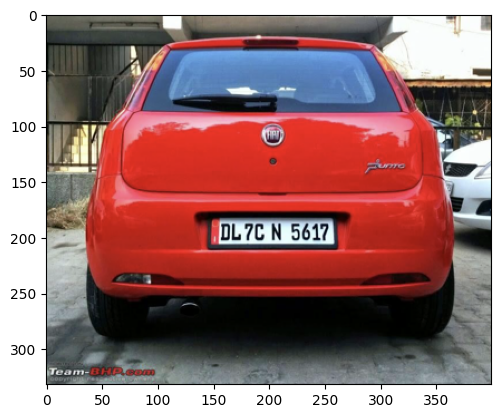

In [38]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', 'Cars34.png')

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
detections['detection_boxes']

array([[5.46604991e-01, 3.65578204e-01, 6.35703921e-01, 6.43432140e-01],
       [5.33256054e-01, 3.43190968e-01, 6.66047812e-01, 6.80380404e-01],
       [2.87400514e-01, 0.00000000e+00, 4.42846745e-01, 1.25353277e-01],
       [8.02649856e-02, 1.33349281e-02, 1.65763035e-01, 6.63439929e-02],
       [4.63508785e-01, 3.23400140e-01, 6.33464634e-01, 7.03192472e-01],
       [4.96420979e-01, 3.72779429e-01, 6.15958691e-01, 6.59464180e-01],
       [9.66757953e-01, 6.89976662e-03, 9.98347938e-01, 1.29276961e-01],
       [1.09239228e-01, 5.04908338e-03, 1.68422848e-01, 7.34242052e-02],
       [5.70102513e-01, 3.96135032e-01, 6.33944929e-01, 6.03860319e-01],
       [3.26707542e-01, 0.00000000e+00, 4.96427774e-01, 1.08918063e-01],
       [5.47285140e-01, 4.79077935e-01, 6.35476410e-01, 6.55390143e-01],
       [1.80943608e-02, 1.22431338e-01, 6.94967210e-01, 8.97147596e-01],
       [9.59511220e-01, 2.36910321e-02, 9.88251746e-01, 1.17062390e-01],
       [9.67059851e-01, 0.00000000e+00, 1.00000000e

In [40]:
detections['detection_scores']

array([0.7090662 , 0.10717437, 0.09760348, 0.07742237, 0.0701224 ,
       0.05604212, 0.05159428, 0.04782899, 0.04615857, 0.04312541,
       0.04031056, 0.03962835, 0.03835668, 0.03787376, 0.03686645,
       0.03634103, 0.03548881, 0.03416204, 0.03177975, 0.03014224,
       0.02930345, 0.02912156, 0.02887428, 0.02843269, 0.02822907,
       0.02782896, 0.02667584, 0.02629231, 0.02512044, 0.02468773,
       0.02402655, 0.0234085 , 0.02214123, 0.02192562, 0.02168357,
       0.0210882 , 0.02068381, 0.020628  , 0.02059722, 0.02035157,
       0.0200613 , 0.01994402, 0.0197244 , 0.01959648, 0.01956079,
       0.01953138, 0.0193734 , 0.01924224, 0.01892853, 0.01871176,
       0.01844938, 0.01831687, 0.01815495, 0.01809328, 0.01803099,
       0.01798346, 0.01790305, 0.01770324, 0.01767107, 0.01765625,
       0.0176139 , 0.01754582, 0.01754332, 0.0174215 , 0.0174173 ,
       0.0173579 , 0.01719466, 0.01683743, 0.01671893, 0.01629445,
       0.01625237, 0.0160454 , 0.01595986, 0.01559364, 0.01554

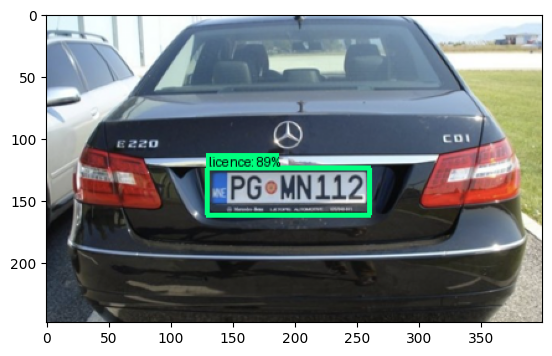

In [41]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', 'Cars1.png')

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

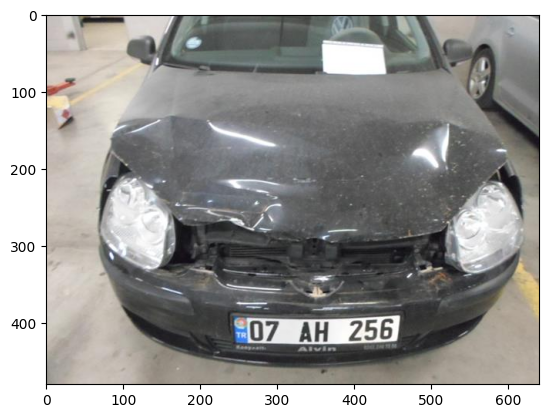

In [51]:
img = cv2.imread("/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/plate/814890_kopyası.png")
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

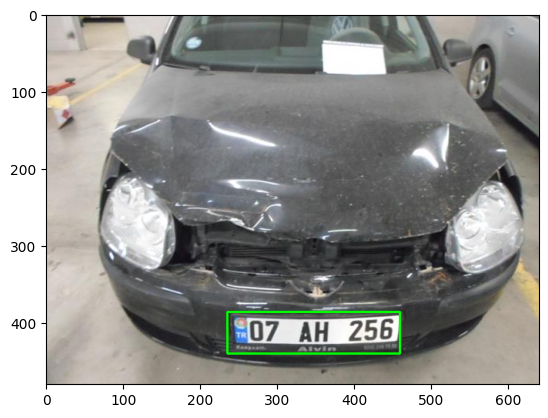

In [52]:
image_height, image_width, _ =img.shape
bounding_box=detections['detection_boxes'][0]
y_min, x_min, y_max, x_max = bounding_box
top = int(y_min * image_height)
left = int(x_min * image_width)
bottom = int(y_max * image_height)
right = int(x_max * image_width)

color = (0, 255, 0)  # Green color in BGR
thickness = 2        # Line thickness
cv2.rectangle(img, (left, top), (right, bottom), color, thickness)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [89]:
detections['detection_boxes']

array([[8.05339277e-01, 3.68181944e-01, 9.17566478e-01, 7.18464971e-01],
       [6.64473698e-02, 5.71788192e-01, 1.63573295e-01, 6.78824782e-01],
       [2.30071619e-01, 9.43770632e-04, 2.96132624e-01, 5.37836030e-02],
       [2.17499375e-01, 0.00000000e+00, 2.78235644e-01, 5.15575781e-02],
       [2.09043309e-01, 4.93767858e-03, 2.91169047e-01, 6.00775331e-02],
       [2.50465453e-01, 7.41818920e-04, 3.13865185e-01, 5.39770126e-02],
       [2.00675637e-01, 0.00000000e+00, 2.50774056e-01, 4.74372283e-02],
       [4.72979136e-02, 5.62830687e-01, 1.60747990e-01, 7.46664762e-01],
       [2.16069221e-01, 0.00000000e+00, 2.66454756e-01, 3.90184745e-02],
       [5.06485030e-02, 6.67213917e-01, 1.76675111e-01, 9.17238712e-01],
       [1.17851302e-01, 8.43303978e-01, 2.37279132e-01, 9.10470188e-01],
       [1.75605983e-01, 0.00000000e+00, 2.21563250e-01, 4.48477305e-02],
       [8.48338544e-01, 3.09577763e-01, 1.00000000e+00, 7.98105657e-01],
       [8.30190480e-01, 4.16413665e-01, 8.99163425e

In [90]:
detections['detection_scores']

array([0.6553975 , 0.21433274, 0.14151087, 0.13360508, 0.10231098,
       0.09632305, 0.08720578, 0.06067884, 0.05910642, 0.04992594,
       0.04949114, 0.04612495, 0.04519025, 0.04473776, 0.04333692,
       0.04062837, 0.0383129 , 0.03748902, 0.03622743, 0.03512091,
       0.03483482, 0.03375321, 0.03292097, 0.03203162, 0.0314602 ,
       0.03083692, 0.03007223, 0.03001542, 0.02970742, 0.02793057,
       0.02671115, 0.02669603, 0.02506736, 0.02485474, 0.02470316,
       0.02441757, 0.0241216 , 0.02397213, 0.02355115, 0.02342026,
       0.02327039, 0.02270899, 0.0220813 , 0.02170125, 0.0206609 ,
       0.02033136, 0.02032571, 0.02032112, 0.01999244, 0.01944469,
       0.01930048, 0.01906531, 0.01850191, 0.01848469, 0.01822621,
       0.01788545, 0.01777844, 0.01756675, 0.01753696, 0.017423  ,
       0.01698845, 0.01686997, 0.01628632, 0.01601917, 0.01598101,
       0.01597764, 0.01593749, 0.01589174, 0.01587894, 0.01586072,
       0.01577027, 0.0156326 , 0.01562136, 0.01561302, 0.01556

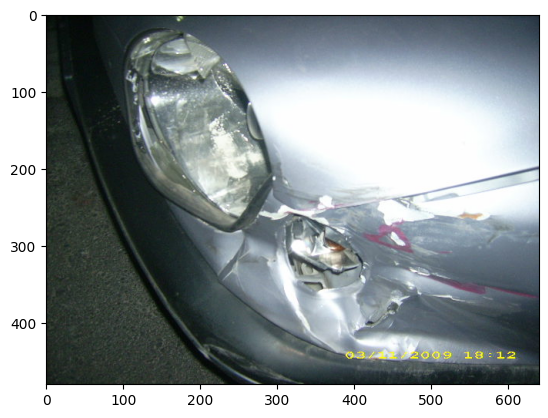

In [128]:
img = cv2.imread("/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/no_plate/1258383247_kopyası.png")
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [129]:
image_np_with_detections

array([[[ 6,  8,  8],
        [ 5,  7,  7],
        [ 5,  8,  6],
        ...,
        [59, 49, 39],
        [58, 48, 38],
        [57, 47, 37]],

       [[ 6,  8,  8],
        [ 6,  8,  8],
        [ 6,  9,  7],
        ...,
        [58, 48, 38],
        [58, 48, 38],
        [58, 48, 38]],

       [[ 7,  9,  9],
        [ 7,  9,  9],
        [ 7, 10,  8],
        ...,
        [60, 48, 38],
        [60, 48, 38],
        [61, 49, 39]],

       ...,

       [[23, 30, 25],
        [24, 31, 26],
        [24, 32, 25],
        ...,
        [33, 32, 22],
        [31, 30, 20],
        [30, 29, 19]],

       [[20, 29, 26],
        [20, 29, 26],
        [19, 29, 23],
        ...,
        [28, 26, 15],
        [27, 25, 14],
        [27, 25, 14]],

       [[21, 30, 27],
        [20, 29, 26],
        [19, 29, 23],
        ...,
        [22, 21,  7],
        [23, 22,  8],
        [26, 25, 11]]], dtype=uint8)

In [130]:
detections['detection_boxes']

array([[0.6992048 , 0.5122049 , 0.75057125, 0.55416405],
       [0.67801857, 0.51581293, 0.7313807 , 0.5601445 ],
       [0.6676706 , 0.50880706, 0.72267854, 0.5690485 ],
       [0.00935619, 0.10595709, 0.1634062 , 0.33616096],
       [0.70522964, 0.50651884, 0.7635708 , 0.5646639 ],
       [0.6907416 , 0.49936166, 0.75412303, 0.5437622 ],
       [0.92450887, 0.30808562, 0.9756462 , 0.40256578],
       [0.7900622 , 0.5118875 , 0.8825605 , 0.5673608 ],
       [0.42850095, 0.9501894 , 0.4645484 , 0.9901343 ],
       [0.4356698 , 0.9503368 , 0.4686542 , 0.98137534],
       [0.00899195, 0.74157035, 0.09457715, 1.        ],
       [0.67778254, 0.50283843, 0.73689103, 0.54608566],
       [0.301417  , 0.3781899 , 0.4101925 , 0.43328765],
       [0.9687925 , 0.27661893, 1.        , 0.40065625],
       [0.6942141 , 0.5038006 , 0.74073493, 0.5655679 ],
       [0.94769543, 0.2976351 , 0.9866453 , 0.39843145],
       [0.44753474, 0.9516515 , 0.4851799 , 0.99163884],
       [0.4561577 , 0.9483774 ,

In [131]:
detections['detection_scores']

array([0.10350451, 0.07565135, 0.04206137, 0.04182643, 0.04150828,
       0.03852316, 0.0352841 , 0.03340539, 0.0325032 , 0.03157829,
       0.03054566, 0.03054229, 0.02953742, 0.02902713, 0.02896924,
       0.02841816, 0.0279192 , 0.02766502, 0.02752864, 0.02719738,
       0.02681021, 0.02653989, 0.02626123, 0.02605527, 0.02529188,
       0.02524737, 0.02478583, 0.02330456, 0.02274935, 0.02256718,
       0.02242375, 0.02209472, 0.0218303 , 0.02179438, 0.02156951,
       0.02145431, 0.02145094, 0.0213399 , 0.02130434, 0.0212791 ,
       0.02127249, 0.02099257, 0.02090422, 0.02069193, 0.02066989,
       0.0203642 , 0.02031576, 0.02031064, 0.02011343, 0.01998906,
       0.01997174, 0.01954681, 0.01951143, 0.0192584 , 0.01922881,
       0.01918748, 0.01918577, 0.0191853 , 0.01902185, 0.01873921,
       0.01833804, 0.01788522, 0.01787959, 0.01776766, 0.01766578,
       0.0175366 , 0.01751599, 0.01741644, 0.01739295, 0.01735768,
       0.01732918, 0.01732151, 0.01727077, 0.01718746, 0.01714

# Finding a Threshold:

In [53]:
#no_plate images:
no_plate=["1256747073_kopyası.png", "1262771659_kopyası.png", "1287581189_kopyası.png", "1315913926_kopyası.png", "1328519389_kopyası.png", \
"1258383247_kopyası.png", "1268838438_kopyası.png", "1306400897_kopyası.png", "1322135004_kopyası.png", "235230_kopyası.png"]


In [54]:
#plate images:
plate= ["1189672816_kopyası.png", "1208762194_kopyası.png", "1223654263_kopyası.png", "1250843636_kopyası.png", "814890_kopyası.png", \
"1190966942_kopyası.png", "1209645572_kopyası.png", "1240554556_kopyası.png", "755894_kopyası.png", "928855_kopyası.png"]



In [56]:
#for no plate:

no_plate_dir="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/no_plate/"

no_plate_scores=[]

for file in no_plate:

    IMAGE_PATH = no_plate_dir + file

    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    
    #detections['num_detections'] = num_detections
    # detection_classes should be ints.
    #detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    no_plate_scores +=[detections['detection_scores'][0]]

    #output_path = "..."
    #cv2.imwrite(output_path, cv2.cvtColor(image_np_with_detections, cv2.COLOR_RGB2BGR))
    #print(f"Image with detections saved to {output_path}")
    
print(no_plate_scores)
    



[0.08325463, 0.5334197, 0.18341573, 0.45827612, 0.44997463, 0.10350451, 0.083144076, 0.11984844, 0.28263205, 0.068102494]


In [63]:
np.mean(no_plate_scores)

0.23655725

In [62]:
#for plate:

plate_dir="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/plate/"

plate_scores=[]

for file in plate:

    
    IMAGE_PATH = plate_dir + file

    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}

    #detections['num_detections'] = num_detections
    # detection_classes should be ints.
    #detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    plate_scores +=[detections['detection_scores'][0]]

    image_height, image_width, _ =img.shape
    bounding_box=detections['detection_boxes'][0]
    y_min, x_min, y_max, x_max = bounding_box
    top = int(y_min * image_height)
    left = int(x_min * image_width)
    bottom = int(y_max * image_height)
    right = int(x_max * image_width)

    color = (0, 255, 0)  # Green color in BGR
    thickness = 2        # Line thickness
    cv2.rectangle(img, (left, top), (right, bottom), color, thickness)
    
    output_dir = "/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/plate_results"

    #output_file_name = os.path.basename(IMAGE_PATH).replace('.png', '_detected.png')
    output_file_name = file[:-4]+"_detected.png"
    output_path = os.path.join(output_dir, output_file_name)
    
    cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    #print(f"Image with detections saved to {output_path}")
    
print(plate_scores)

[0.85815495, 0.80478597, 0.52662903, 0.78396416, 0.6553975, 0.24715307, 0.4601239, 0.31815004, 0.6834539, 0.7226602]


In [64]:
np.mean(plate_scores)

0.6060473

In [ ]:
"/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/plate"

"/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/no_plate"



## setting threshold=0.5

#  Blurring the licence plates:

In [65]:
IMAGE_PATH="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/plate/814890_kopyası.png"

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_height, image_width, _ =img.shape
bounding_box=detections['detection_boxes'][0]
y_min, x_min, y_max, x_max = bounding_box
top = int(y_min * image_height)
left = int(x_min * image_width)
bottom = int(y_max * image_height)
right = int(x_max * image_width)

img[top:bottom, left:right] = (0, 0, 0)  # Set pixels to black (BGR: 0, 0, 0)

# Save the image with the blacked-out area
output_dir = "/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/plate_detection/"

# Generate a file name for the output
output_file_name = os.path.basename(IMAGE_PATH).replace('.png', '_blacked_out.png')
output_path = os.path.join(output_dir, output_file_name)

cv2.imwrite(output_path, img)

True

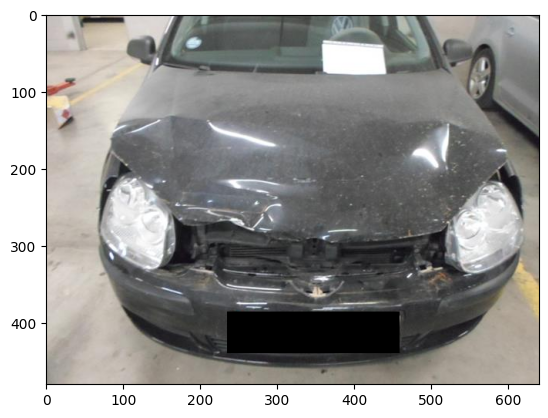

In [66]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [89]:
HASARLI_dir="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/HASARLI/"

HASARLI=[file for file in os.listdir(HASARLI_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]



In [90]:
#for HASARLI:

HASARLI_scores=[]

for file in HASARLI:

    IMAGE_PATH = HASARLI_dir + file

    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    
    score= detections['detection_scores'][0]

    HASARLI_scores += [score]
    
    if score > 0.5:
        
        image_height, image_width, _ =img.shape
        bounding_box=detections['detection_boxes'][0]
        y_min, x_min, y_max, x_max = bounding_box
        top = int(y_min * image_height)
        left = int(x_min * image_width)
        bottom = int(y_max * image_height)
        right = int(x_max * image_width)

        img[top:bottom, left:right] = (0, 0, 0)  # Set pixels to black (BGR: 0, 0, 0)

        # Save the image with the blacked-out area
        output_dir = "/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/HASARLI_BLURRED/"

        # Generate a file name for the output
        output_file_name = file[:-4]+"_blurred.png"
        output_path = os.path.join(output_dir, output_file_name)
        
    else:
        
        # Save the image with the blacked-out area
        output_dir = "/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/HASARLI_BLURRED/"

        # Generate a file name for the output
        output_file_name = file[:-4]+".png"
        output_path = os.path.join(output_dir, output_file_name)
        

    cv2.imwrite(output_path, img)


Corrupt JPEG data: 23 extraneous bytes before marker 0xd9
Corrupt JPEG data: 25 extraneous bytes before marker 0xd9


In [82]:
IMAGE_PATH

'/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/HASARLI/.DS_Store'

In [91]:
HASARSIZ_dir="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/HASARSIZ/"

HASARSIZ=[file for file in os.listdir(HASARSIZ_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]



In [92]:
#for HASARSIZ:

HASARSIZ_scores=[]

for file in HASARSIZ:

    IMAGE_PATH = HASARSIZ_dir + file

    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    
    score= detections['detection_scores'][0]

    HASARSIZ_scores += [score]
    
    if score > 0.5:
        
        image_height, image_width, _ =img.shape
        bounding_box=detections['detection_boxes'][0]
        y_min, x_min, y_max, x_max = bounding_box
        top = int(y_min * image_height)
        left = int(x_min * image_width)
        bottom = int(y_max * image_height)
        right = int(x_max * image_width)

        img[top:bottom, left:right] = (0, 0, 0)  # Set pixels to black (BGR: 0, 0, 0)

        # Save the image with the blacked-out area
        output_dir = "/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/HASARSIZ_BLURRED/"

        # Generate a file name for the output
        output_file_name = file[:-4]+"_blurred.png"
        output_path = os.path.join(output_dir, output_file_name)
        
    else:
        
        # Save the image with the blacked-out area
        output_dir = "/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/DS542_Final_Project_Dataset/HASARSIZ_BLURRED/"

        # Generate a file name for the output
        output_file_name = file[:-4]+".png"
        output_path = os.path.join(output_dir, output_file_name)
        

    cv2.imwrite(output_path, img)